# Handwritten Digit Recognition using MNIST Dataset 

In [1]:
import numpy as np
import h5py
from keras.datasets import mnist #dataset of 60K small square 60*60pixel grayscale images of handwritten digits
from matplotlib import pyplot as plt
#loading the dataset

(trainx,trainy),(testx,testy)=mnist.load_data() #dataset available at amazonaws.com
print('Train: X=%s, Y=%s' %(trainx.shape,trainy.shape))
print('Test: X=%s, Y=%s' %(testx.shape,testy.shape))

Using TensorFlow backend.


Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


<Figure size 640x480 with 9 Axes>

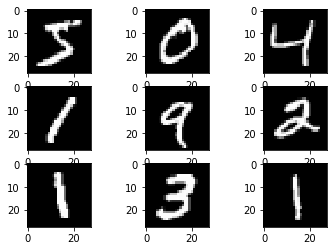

In [2]:
#plotting the first few images
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(trainx[i],cmap=plt.get_cmap('gray'))  #subplot(nrows, ncols, index, **kwargs)
                                                     #subplot(pos, **kwargs)
plt.show()

In [3]:
#importing other required tools
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from sklearn.model_selection import KFold

In [4]:
""" 5 useful aspects of a machine learning model:
1.Loading of the dataset
2.Preparation of the dataset
3.Definition of the model
4.Evaluation of the model
5.Presentation of results
"""

' 5 useful aspects of a machine learning model:\n1.Loading of the dataset\n2.Preparation of the dataset\n3.Definition of the model\n4.Evaluation of the model\n5.Presentation of results\n'

In [5]:
(trainx,trainy),(testx,testy)=mnist.load_data()
trainx=trainx.reshape((trainx.shape[0],28,28,1))
testx=testx.reshape((testx.shape[0],28,28,1))

In [6]:
#one_hot encoding of labels
trainy=to_categorical(trainy)
testy=to_categorical(testy)

In [7]:
#creating the function to load the dataset
def load_dataset():
    (trainx,trainy),(testx,testy)=mnist.load_data()
    trainx=trainx.reshape((trainx.shape[0],28,28,1))
    testx=testx.reshape((testx.shape[0],28,28,1))
    trainy=to_categorical(trainy)
    testy=to_categorical(testy)
    return trainx,trainy,testx,testy

In [8]:
#creating the function for the preparation of dataset
def prep_dataset(train,test):
    train_norm=train.astype('float32')
    test_norm=test.astype('float32')
    train_norm=train_norm/255.0
    test_norm=test_norm/255.0
    return train_norm,test_norm

In [9]:
#creating the function to define the model
def def_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    opt=SGD(lr=0.01,momentum=0.9)  #use of the stochastic grad desc
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model 

In [10]:
'''To do the evaluation we can use the k fold cross validation taking k=5 such that each test set will be approx 20%
of the total input dataset.K=5 is chosen so as to rather not be too large or be too big to take up a lot of time'''

'To do the evaluation we can use the k fold cross validation taking k=5 such that each test set will be approx 20%\nof the total input dataset.K=5 is chosen so as to rather not be too large or be too big to take up a lot of time'

In [11]:
#function to evaluate the model
def eval_model(datax,datay,n_folds=5):
    scores,histories=list(),list() # for keeping the statistics that will help to analyze the results
    kfold=KFold(n_folds,shuffle=True,random_state=1)
    #enumerate splits
    for train_ix,test_ix in kfold.split(datax):
        model=def_model()
        trainx,trainy,testx,testy=datax[train_ix],datay[train_ix],datax[test_ix],datay[test_ix]
        history=model.fit(trainx,trainy,epochs=10,batch_size=32,validation_data=(testx,testy),verbose=0)
        _,acc=model.evaluate(testx,testy,verbose=0)
        print('>%.3f ' %(acc*100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

In [12]:
#function for analysis of results
def analyze(histories):
    for i in range(len(histories)):
        plt.subplot(2,1,1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'],color='blue',label='train')
        plt.plot(histories[i].history['val_loss'],color='orange',label='test')
                
        plt.subplot(2,1,2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'],color='blue',label='train')
        plt.plot(histories[i].history['val_accuracy'],color='orange',label='test')
    plt.show()

In [13]:
#summarizing the performance
def summary(scores):
    print("accuracy: mean=%.3f std=%.3f,n=%d" %(np.mean(scores)*100,np.std(scores)*100,len(scores)))
    plt.boxplot(scores)
    plt.show()

In [14]:
#finalizing by calling all the functions
def run():
    trainx,trainy,testx,testy=load_dataset()
    trainx,testx=prep_dataset(trainx,testx)
    scores,histories=eval_model(trainx,trainy)
    analyze(histories)
    summary(scores)

>98.575 
>98.750 
>98.525 
>98.758 
>98.725 


C:\Users\hp\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\hp\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


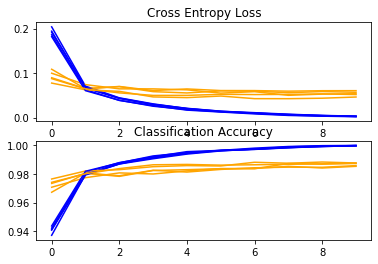

accuracy: mean=98.667 std=0.097,n=5


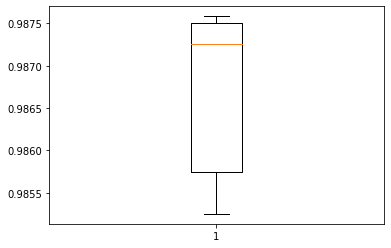

In [15]:
run()

This project is hereby concluded.